<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/). Translated and edited by [Yury Kashnitsky](https://yorko.github.io), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Topic 2. Visual data analysis in Python
## <center>Part 1. Visualization: from Simple Distributions to Dimensionality Reduction

In the field of Machine Learning, *data visualization* is not just making fancy graphics for reports; it is used extensively in day-to-day work for all phases of a project.

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details. It is much more convenient for us, humans, to grasp the main points this way than by reading many lines of raw data. It is amazing how much insight can be gained from seemingly simple charts created with available visualization tools.

Next, when we analyze the performance of a model or report results, we also often use charts and images. Sometimes, for interpreting a complex model, we need to project high-dimensional spaces onto more visually intelligible 2D or 3D figures.

All in all, visualization is a relatively fast way to learn something new about your data. Thus, it is vital to learn its most useful techniques and make them part of your everyday ML toolbox.

In this article, we are going to get hands-on experience with visual exploration of data using popular libraries such as `pandas`, `matplotlib` and `seaborn`.

## Article outline

1. [Dataset](#1.-Dataset)
2. [Univariate visualization](#2.-Univariate-visualization)
    * 2.1 [Quantitative features](#2.1-Quantitative-features)
    * 2.2 [Categorical and binary features](#2.2-Categorical-and-binary-features)
3. [Multivariate visualization](#3.-Multivariate-visualization)
    * 3.1 [Quantitative vs. Quantitative](#3.1-Quantitative-vs.-Quantitative)
    * 3.2 [Quantitative vs. Categorical](#3.2-Quantitative-vs.-Categorical)
    * 3.3 [Categorical vs. Categorical](#3.3-Categorical-vs.-Categorical)
4. [Whole dataset visualizations](#4.-Whole-dataset-visualizations)
    * 4.1 [Naive approach](#4.1-A-naive-approach)
    * 4.2 [Dimensionality reduction](#4.2-Dimensionality-reduction)
    * 4.3 [t-SNE](#4.3-t-SNE)
5. [Assignments](#5.-Assignments)
6. [Useful resources](#6.-Useful-resources)

## 1. Dataset

Before we get to the data, let's initialize our environment:

In [1]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In the first article, we looked at the data on customer churn for a telecom operator. We will reload the same dataset into a `DataFrame`:

In [4]:
df = pd.read_csv("../input/telecom_churn.csv")

To get to know our data, let's look at the first 5 entries using `head()`:

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, **Churn**, is our target variable. It is binary: *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a *target*.

## 2. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### 2.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

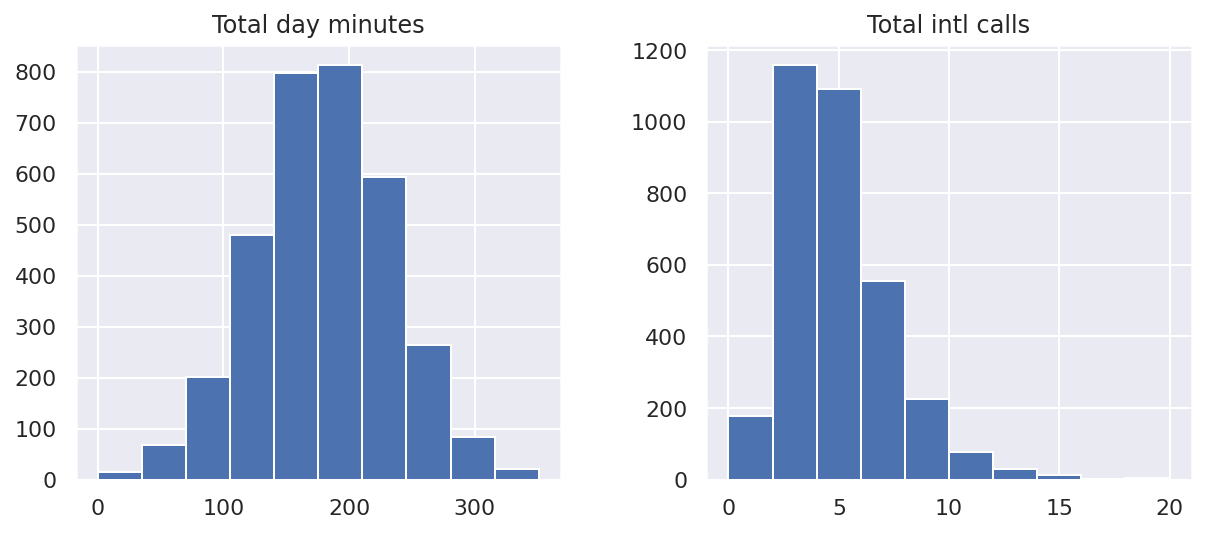

In [6]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

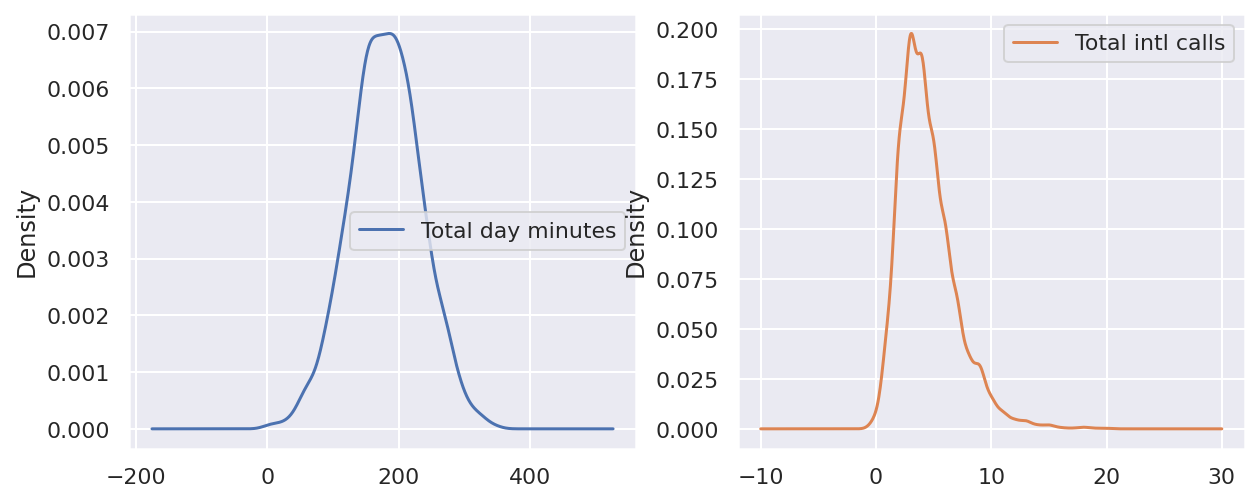

In [7]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

It is also possible to plot a distribution of observations with `seaborn`'s [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). For example, let's look at the distribution of *Total day minutes*. By default, the plot displays both the histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

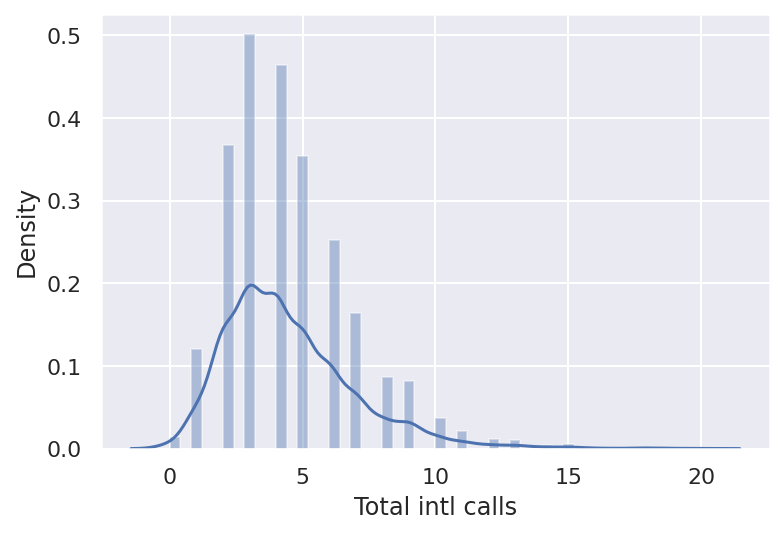

In [8]:
sns.distplot(df["Total intl calls"]);

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

##### Box plot

Another useful type of visualization is a *box plot*. `seaborn` does a great job here:

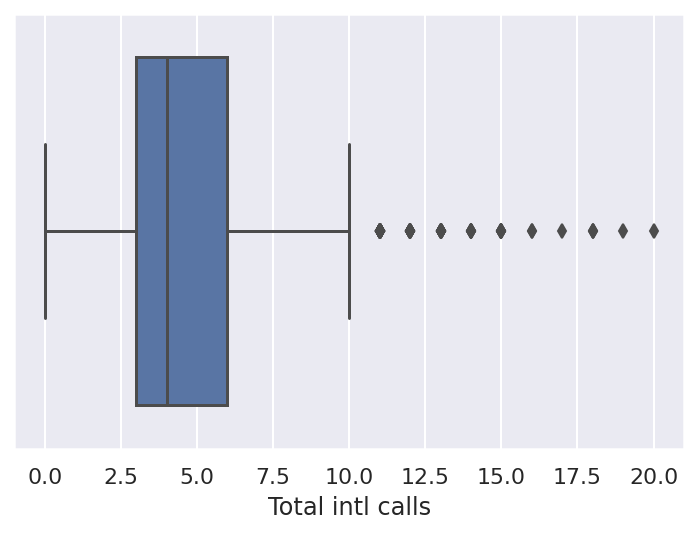

In [9]:
sns.boxplot(x="Total intl calls", data=df);

Let's see how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25th \, (\text{Q1})$ and $75th \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

##### Violin plot

The last type of distribution plots that we will consider is a *violin plot*.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a *violin plot* with the kernel density estimate on both sides.

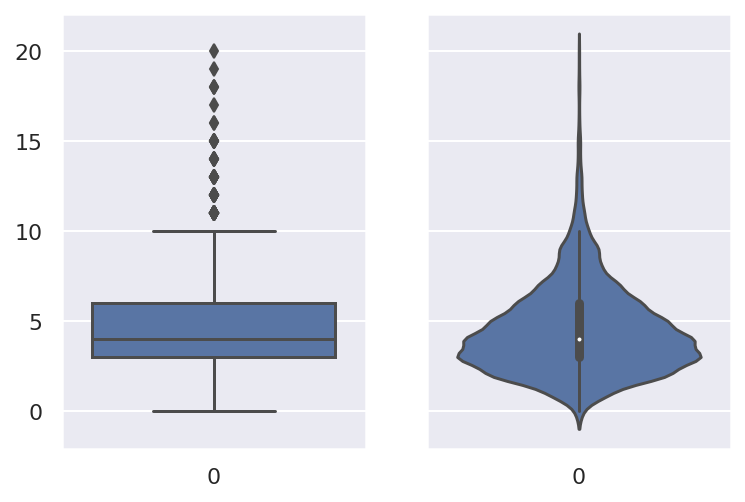

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

##### describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) of a `DataFrame`:

In [11]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


Its output is mostly self-explanatory. *25%*, *50%* and *75%* are the corresponding [percentiles](https://en.wikipedia.org/wiki/Percentile).

#### 2.2 Categorical and binary features

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. *Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

##### Frequency table

Let's check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:

In [12]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not *balanced*; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionally penalize our model errors in predicting the minority "Churn" class.

##### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

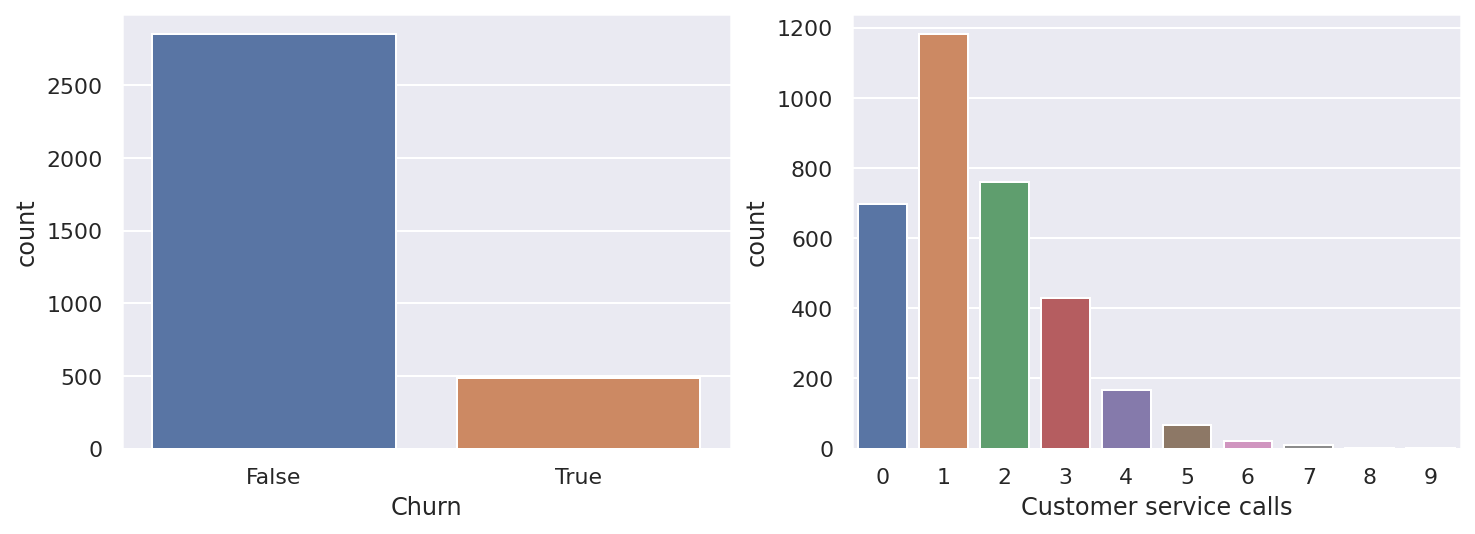

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2-3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

## 3. Multivariate visualization

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 3.1 Quantitative vs. Quantitative

##### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

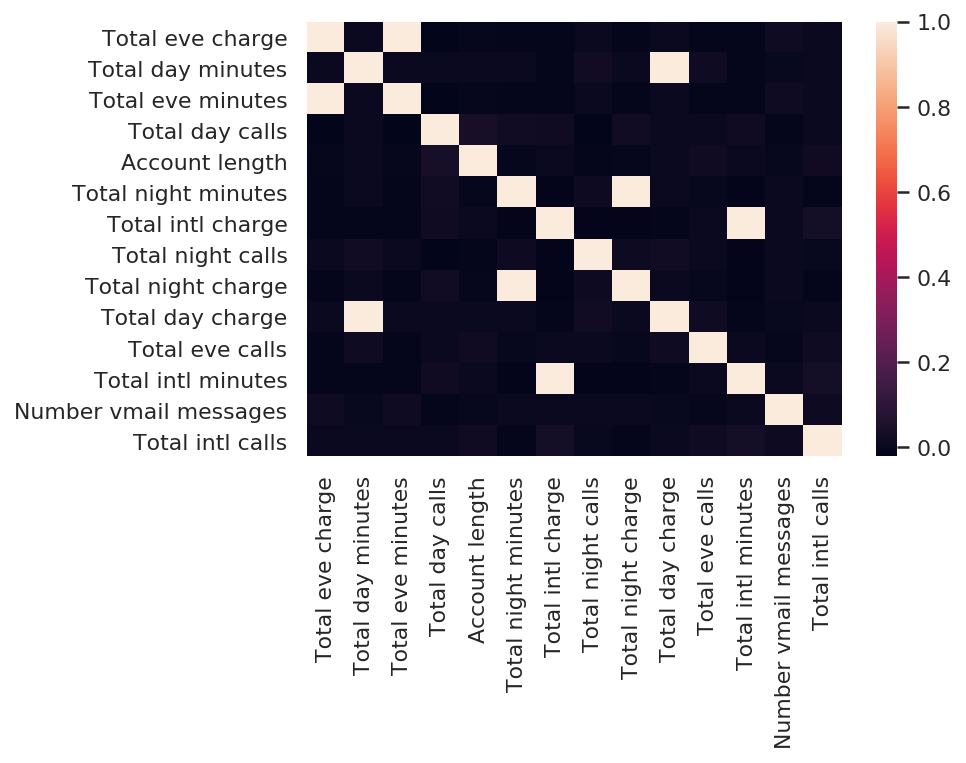

In [12]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as *Total day charge* that have been calculated directly from the number of minutes spent on phone calls (*Total day minutes*). These are called *dependent* variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [13]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

##### Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible.

Let's try out the function [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) from the `matplotlib` library:

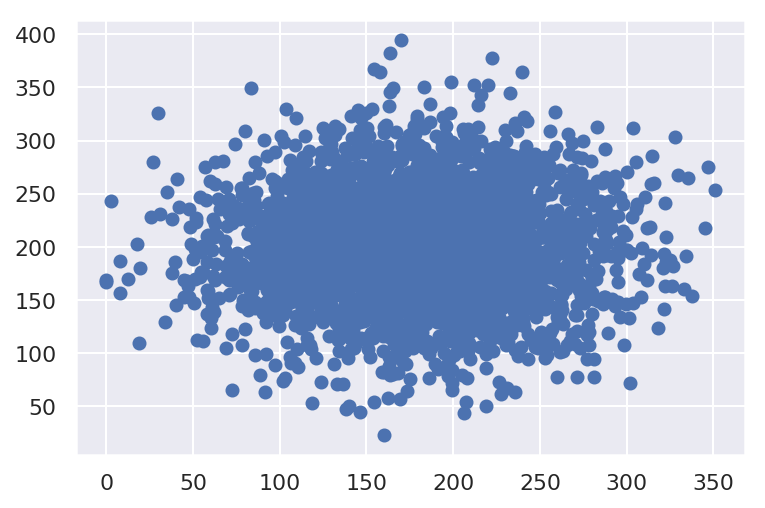

In [14]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

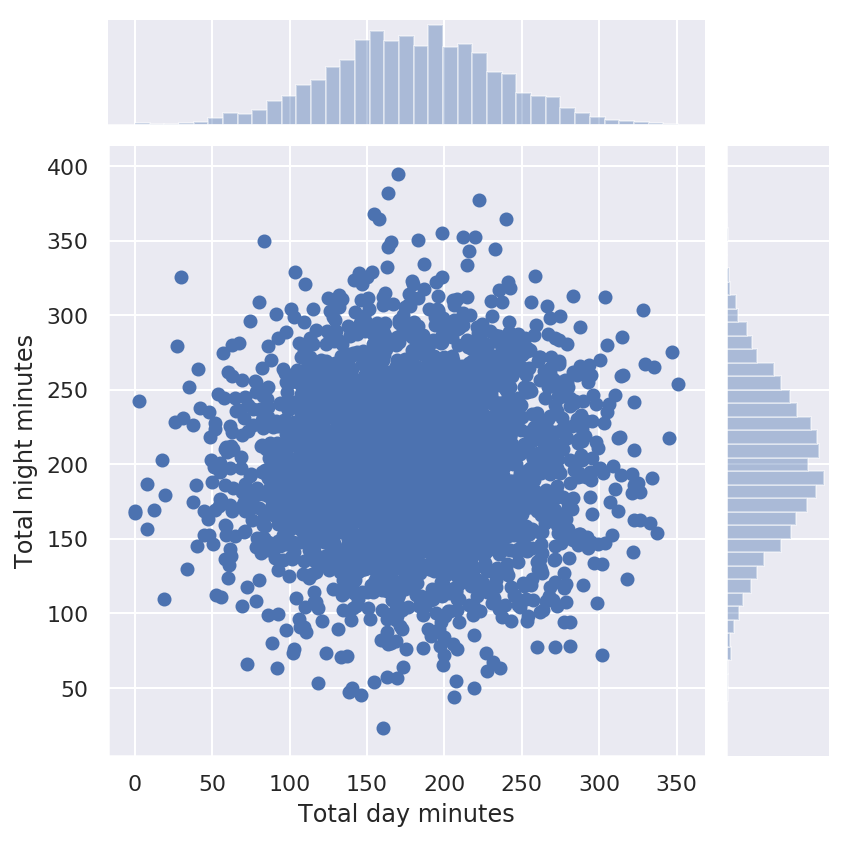

In [15]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:

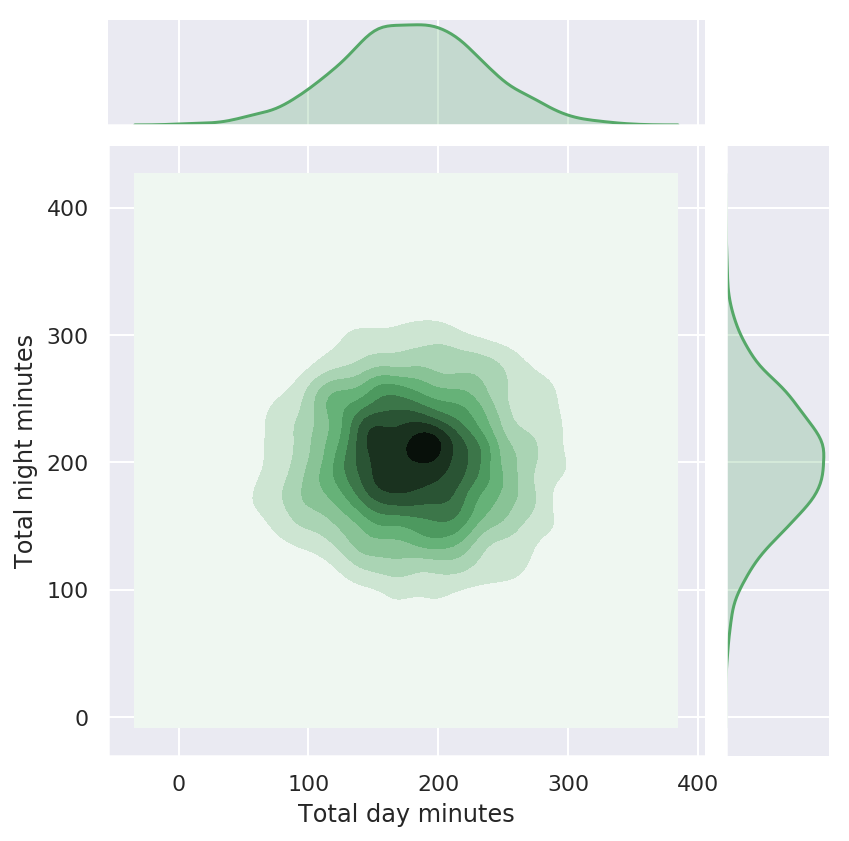

In [16]:
sns.jointplot(
    "Total day minutes", "Total night minutes", data=df, kind="kde", color="g"
);

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

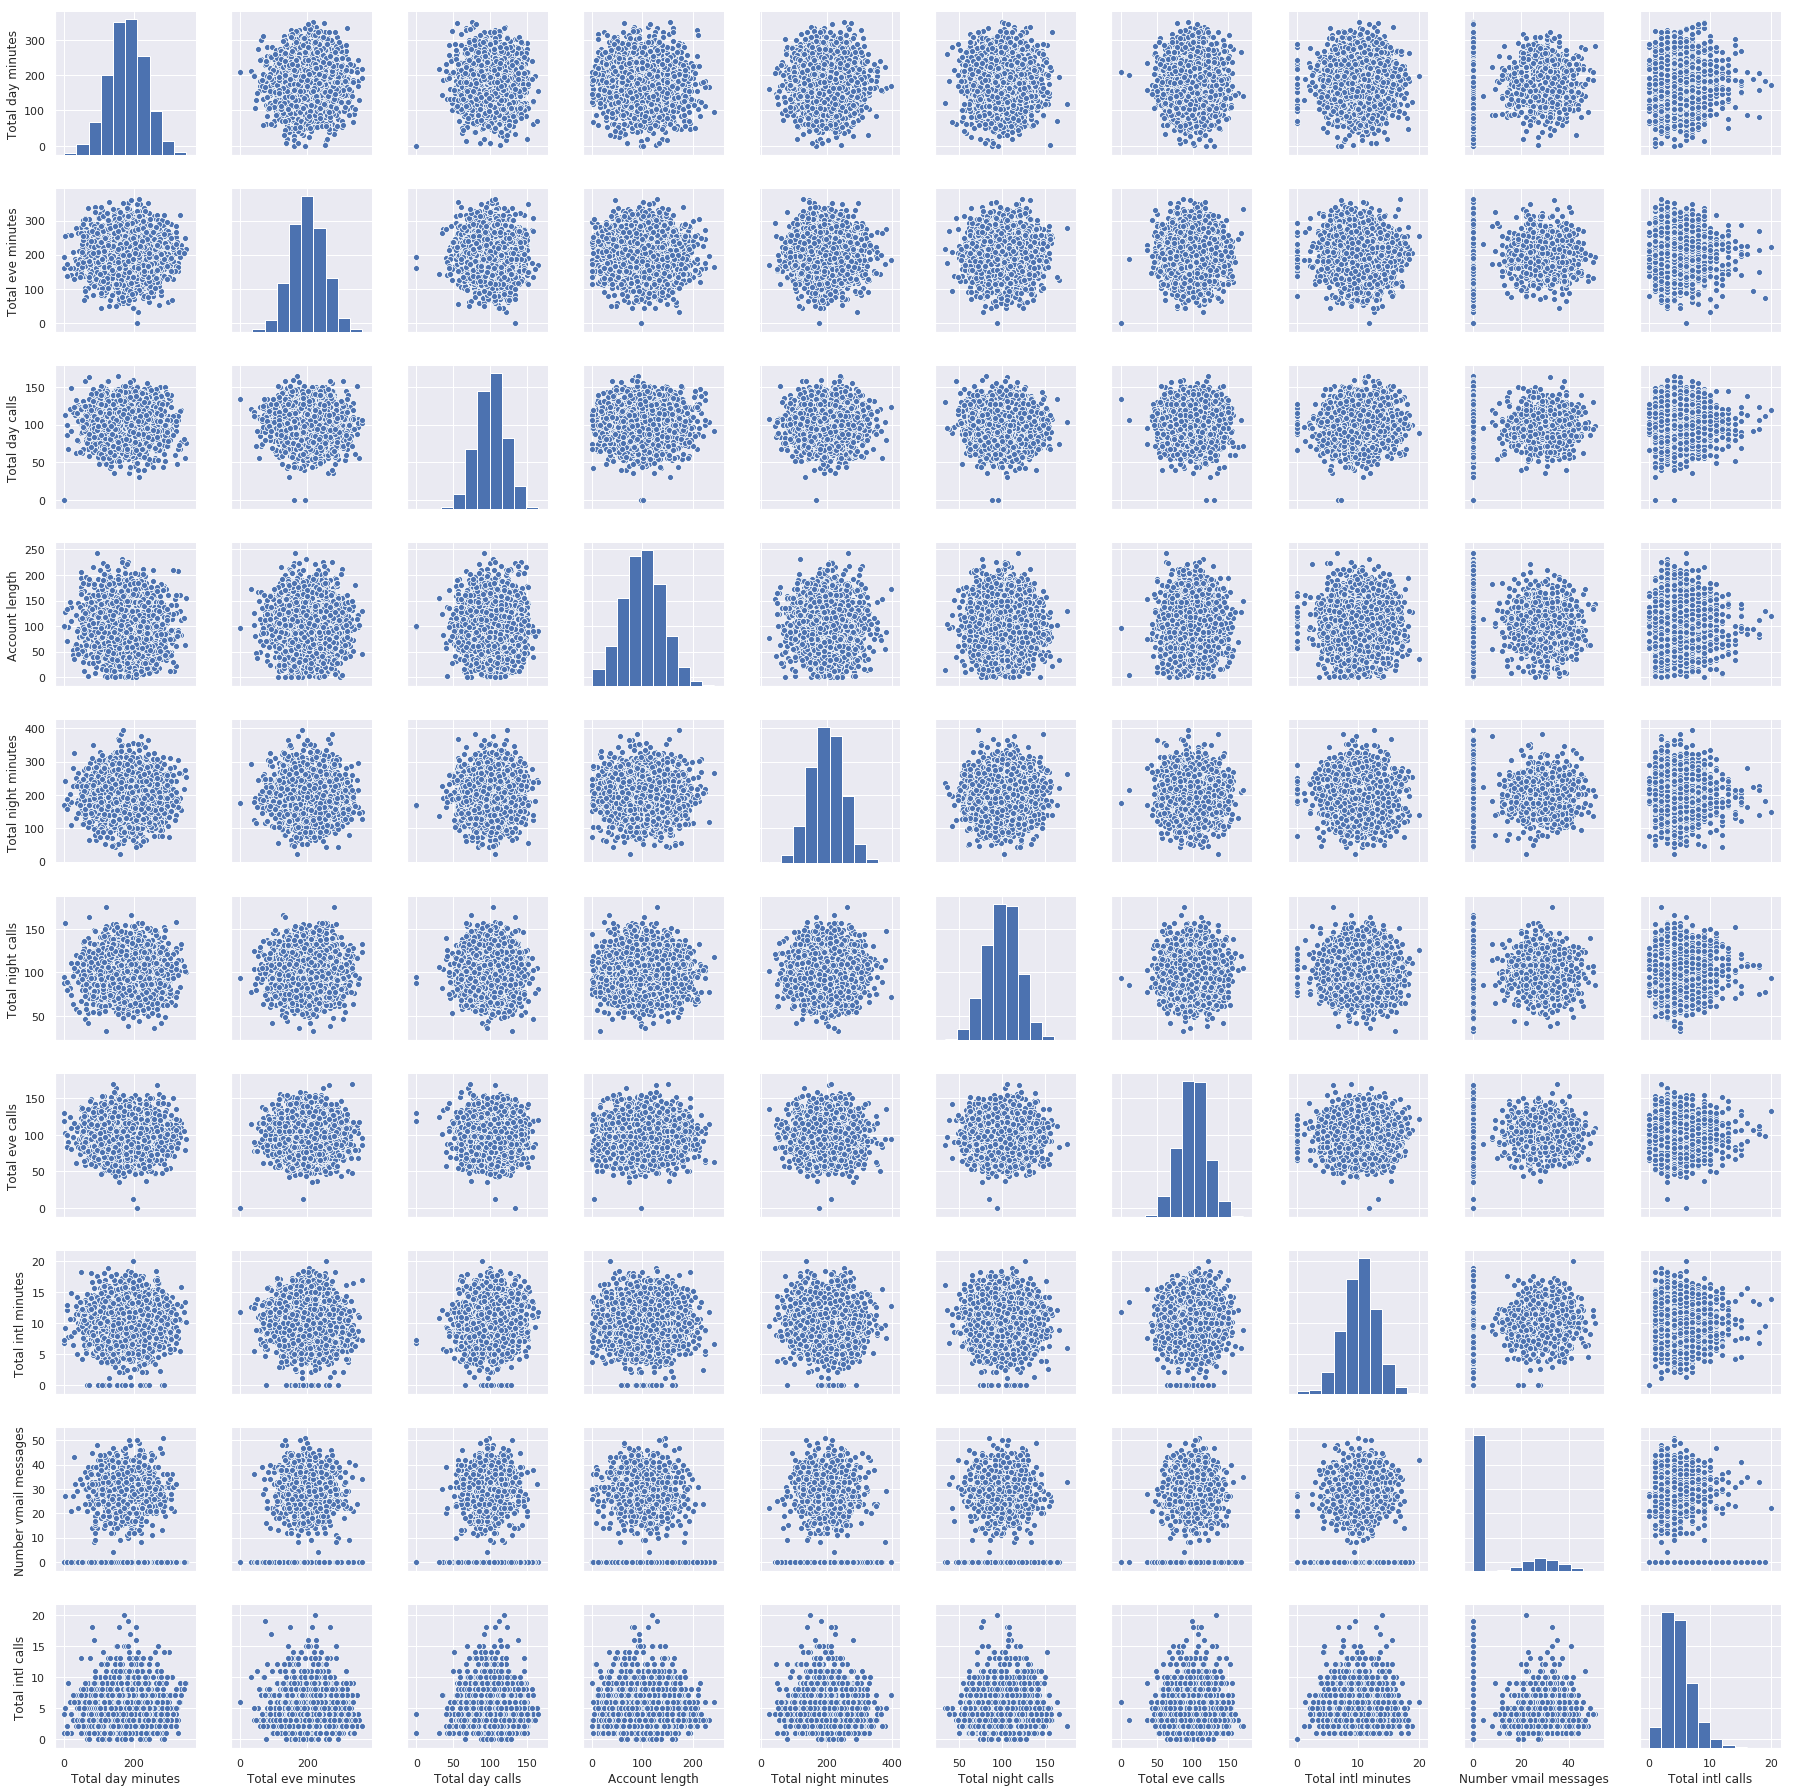

In [17]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [18]:
%config InlineBackend.figure_format = 'retina'

Sometimes, such a visualization may help draw conclusions about data; but, in this case, everything is pretty clear with no surprises.

#### 3.2 Quantitative vs. Categorical

In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Churn.

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a new function called [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and use the parameter `hue` to indicate our categorical feature of interest:

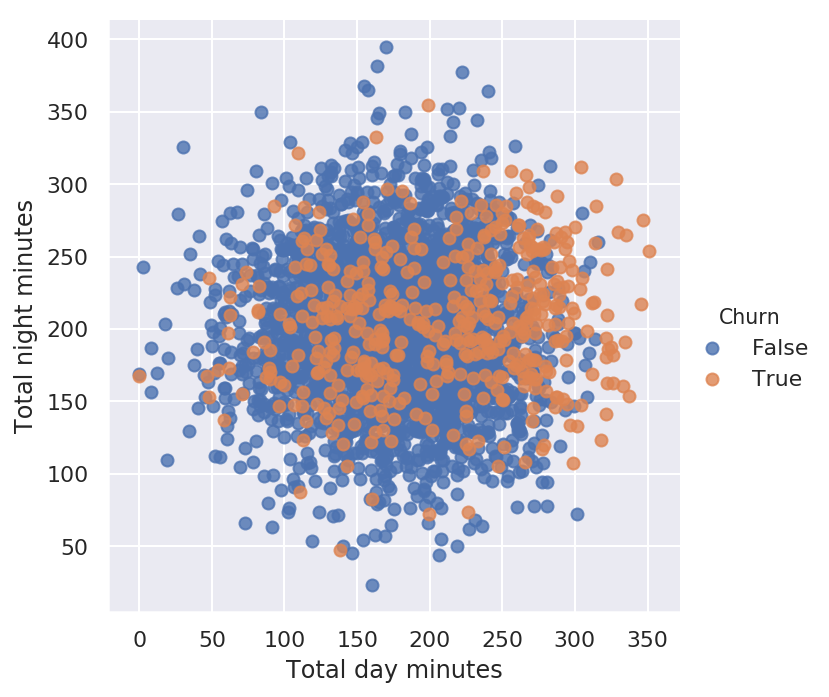

In [19]:
sns.lmplot(
    "Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False
);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, Let's create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (`Churn=False`) and those who left (`Churn=True`).

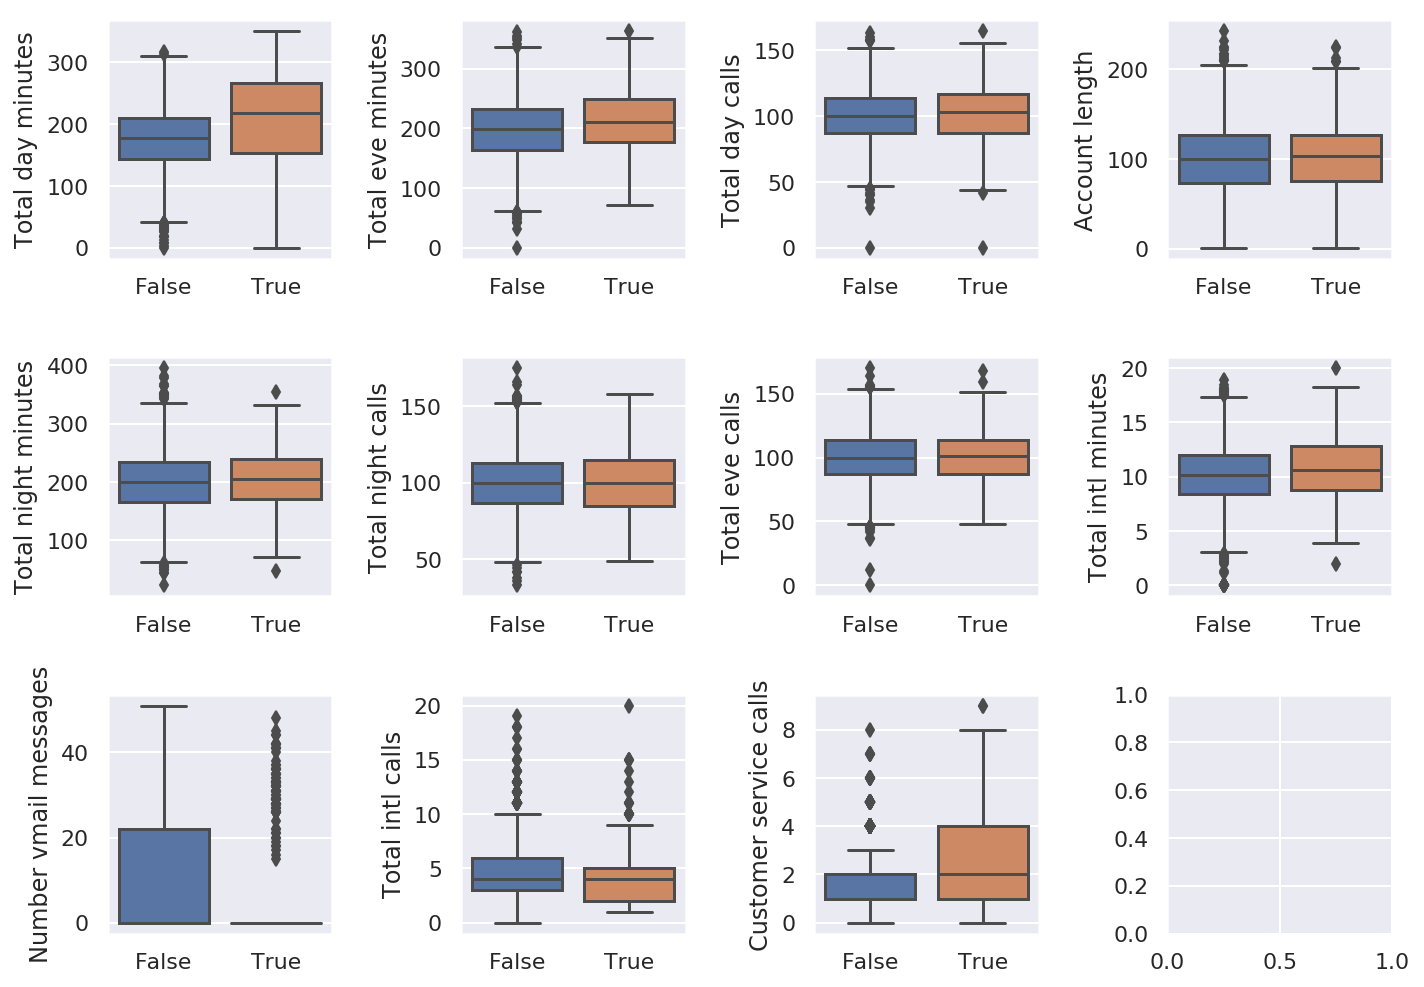

In [20]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: *Total day minutes*, *Customer service calls*, and *Number vmail messages*. Later in this course, we will learn how to determine feature importance in classification using *Random Forest* or *Gradient Boosting*; there, we will see that the first two features are indeed very important for churn prediction.

Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for *Total day minutes* grouped by the target variable.

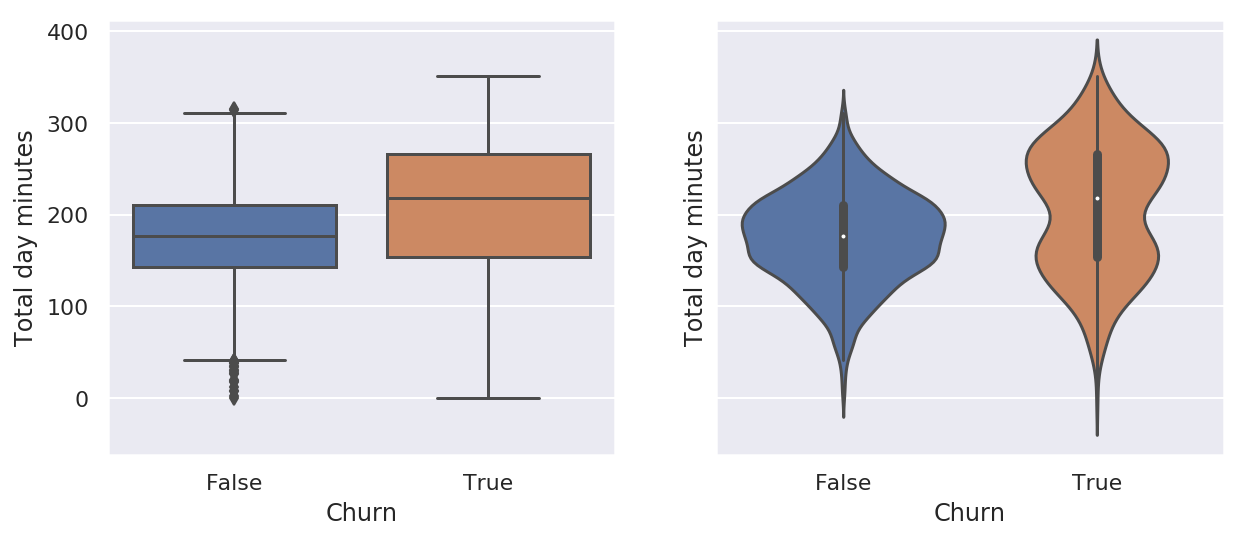

In [21]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

**An interesting observation**: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the `seaborn` library called [`catplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html). For example, let's visualize the interaction between *Total day minutes* and two categorical variables in the same plot:

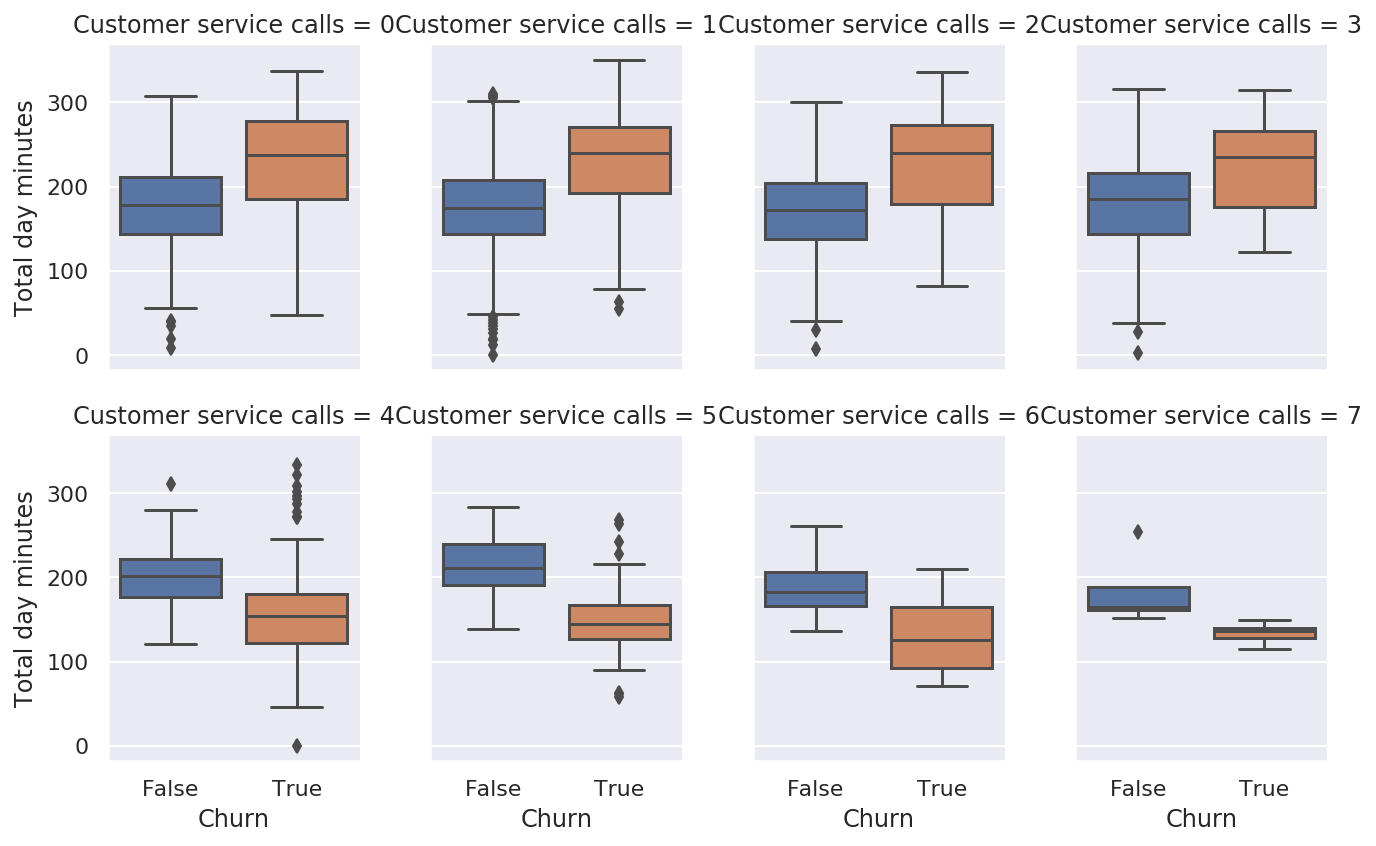

In [22]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

From this, we could conclude that, starting with 4 calls, *Total day minutes* may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#### 3.3 Categorical vs. Categorical

As we saw earlier in this article, the variable *Customer service calls* has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a *count plot*. Now, we are interested in the relationship between this ordinal feature and the target variable *Churn*.

Let's look at the distribution of the number of calls to customer service, again using a *count plot*. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

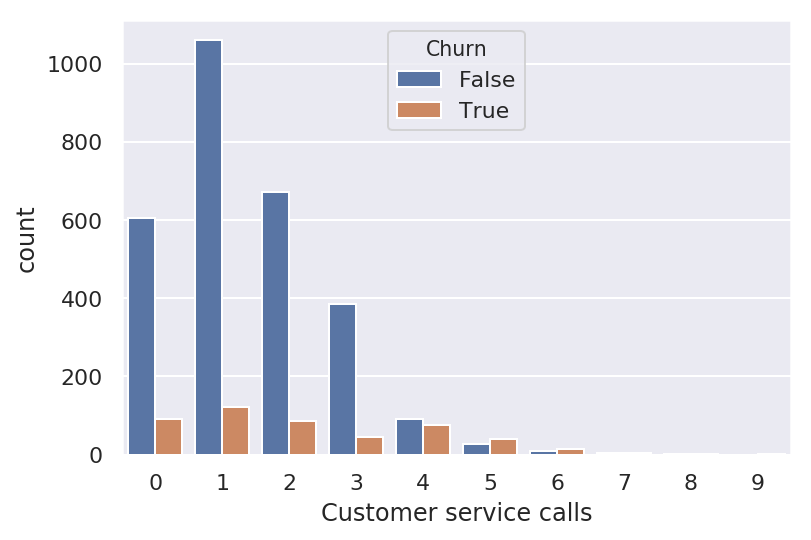

In [23]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

**An observation**: the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between *Churn* and the binary features, *International plan* and *Voice mail plan*.

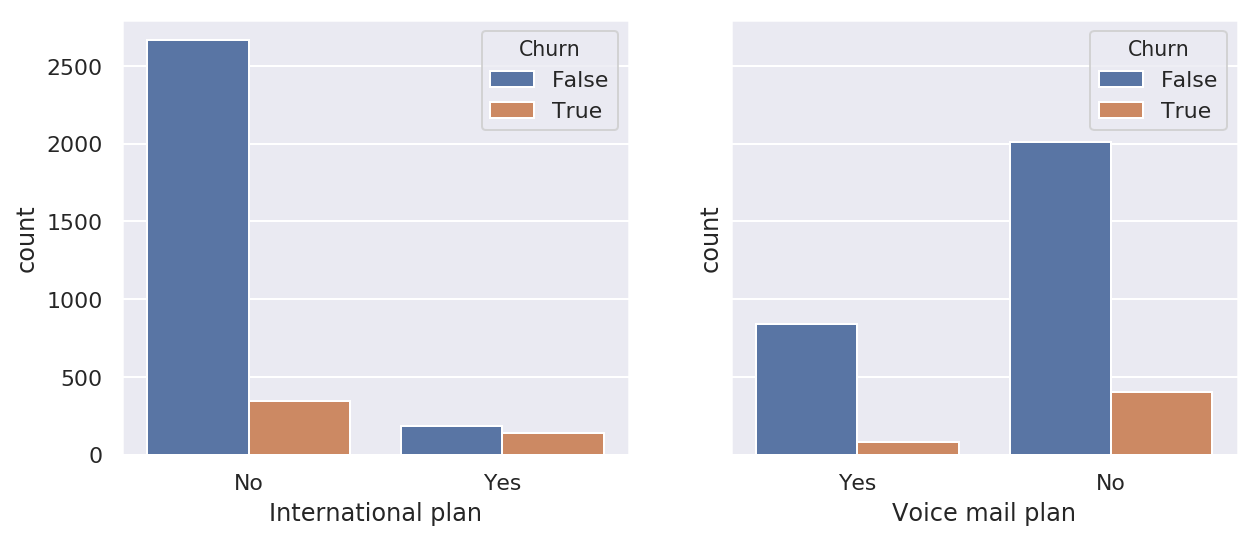

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

**An observation**: when *International Plan* is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with *Voice mail plan*.

##### Contingency table

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a *contingency table*, also called a *cross tabulation*. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how *Churn* is related to the categorical variable *State* by creating a cross tabulation:

In [25]:
pd.crosstab(df["State"], df["Churn"]).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In the case of *State*, the number of distinct values is rather high: 51. We see that there are only a few data points available for each individual state – only 3 to 17 customers in each state abandoned the operator. Let's ignore that for a second and calculate the churn rate for each state, sorting it from high to low:

In [26]:
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


At first glance, it seems that the churn rate in *New Jersey* and *California* are above 25% and less than 6% for Hawaii and Alaska. However, these conclusions are based on too few examples, and our observation could be a mere property of our particular dataset. We can confirm this with the [Matthews](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) and [Cramer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) correlation hypotheses, but this would be beyond the scope of this article.

## 4. Whole dataset visualizations

#### 4.1 A naive approach

We have been looking at different *facets* of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have only dealt with two to three variables at once and were easily able to observe the structure and relationships in data. But, what if we want to display all the features and still be able to interpret the resulting visualization?

We could use `hist()` or create a scatterplot matrix with `pairplot()` for the whole dataset to look at all of our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient. Besides, we would still be analyzing our variables in a pairwise fashion, not all at once.

#### 4.2 Dimensionality reduction

Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called *dimensionality reduction* and is an example of an *unsupervised learning* problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is *Principal Component Analysis* (PCA), which we will study later in this course. Its limitation is that it is a *linear* algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called *Manifold Learning*. One of the best-known of them is *t-SNE*.

#### 4.3 t-SNE

Let's create a [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) representation of the same churn data we have been using. 

The name of the method looks complex and a bit intimidating: *t-distributed Stohastic Neighbor Embedding*. Its math is also impressive (we will not delve into it here, but, if you feel brave, here is the [original article](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) by Laurens van der Maaten and Geoffrey Hinton from [JMLR](http://www.jmlr.org/)). Its basic idea is simple: find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other.

Essentially, *neighbor embedding* is a search for a new and less-dimensional data representation that preserves neighborship of examples.

Now, let's do some practice. First, we need to import some additional classes:

In [14]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

We will leave out the *State* and *Churn* features and convert the values "Yes"/"No" of the binary features into numerical values using [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html):

In [15]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler`.

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, let's build a t-SNE representation:

In [17]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

and plot it:

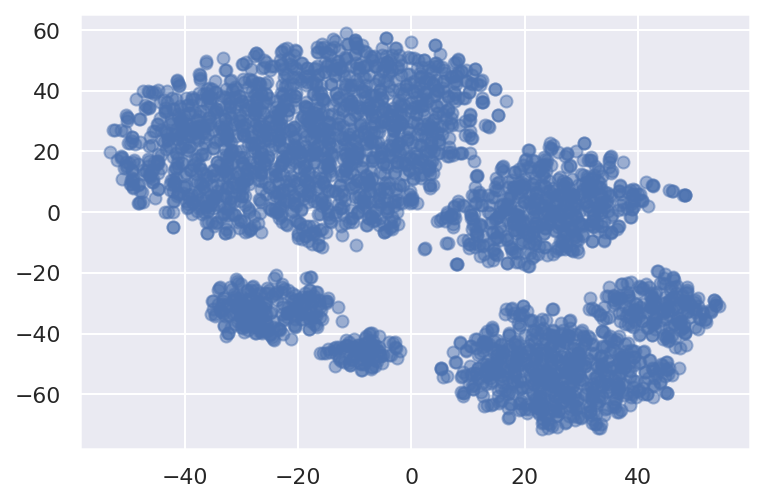

In [18]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

Let's color this t-SNE representation according to the churn (blue for loyal customers, and orange for those who churned).

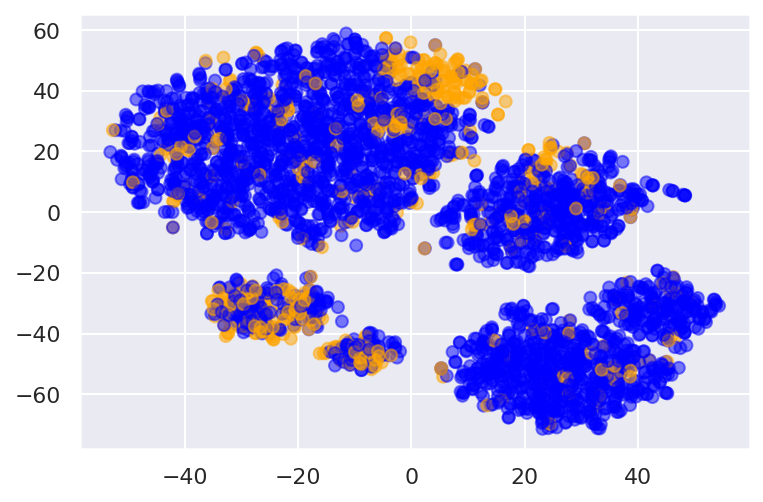

In [19]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

To better understand the picture, we can also color it with the remaining binary features: *International Plan* and *Voicemail*. Orange dots here indicate instances that are positive for the corresponding binary feature.

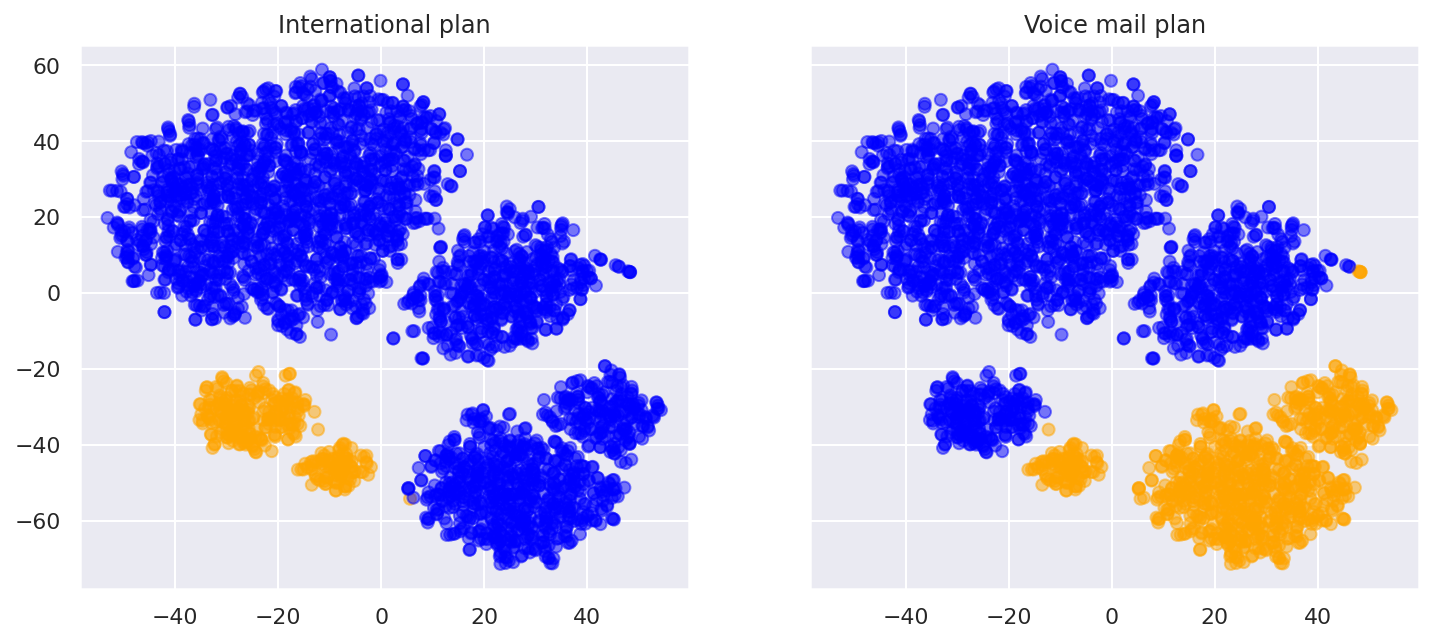

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);

Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in one cluster representing the people with the international plan but no voice mail.

Finally, let's note some disadvantages of t-SNE:
- High computational complexity. The [implementation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) in `scikit-learn` is unlikely to be feasible in a real task. If you have a large number of samples, you should try [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE) instead.
- The plot can change a great deal depending on the random seed, which complicates interpretation. [Here](http://distill.pub/2016/misread-tsne/) is a good tutorial on t-SNE. In general, you shouldn't make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

Occasionally, using t-SNE, you can get a really good intuition for the data. The following is a good paper that shows an example of this for handwritten digits: [Visualizing MNIST](https://colah.github.io/posts/2014-10-Visualizing-MNIST/).

<img src='https://habrastorage.org/webt/-j/j2/c8/-jj2c8zv1jwqo0sygezbmfvu8zo.png' />

## 5. Assignments
### Demo-version
To practice with visual data analysis, you can complete [this demo assignment](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data) where you'll be analyzing cardiovascular disease data. The assignment is just for you to practice, and goes with [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution).

### Bonus version
You can also choose a ["Bonus Assignments" tier](https://www.patreon.com/ods_mlcourse) (details are outlined on the [mlcourse.ai](https://mlcourse.ai/) main page) and get a non-demo version of the assignment where you'll be performing EDA of a much larger dataset of US flights sometimes attending to the performance of basic operations. 

## 6. Useful resources
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).

## Support course creators
<br>
<center>
You can make a monthly (Patreon) or one-time (Ko-Fi) donation ↓

<br>
<br>

<a href="https://www.patreon.com/ods_mlcourse">
<img src="https://habrastorage.org/webt/zc/11/0y/zc110yh0u3kgnlmay1gwbekk0ys.png" width=20% />

<br>

<a href="https://ko-fi.com/mlcourse_ai">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />
    
</center>